# Лабораторная работа №3.4.5
## Выполнил Усеинов Булат Рустэмович 
### 778 группа

In [35]:
import numpy as np
from scipy import interpolate
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

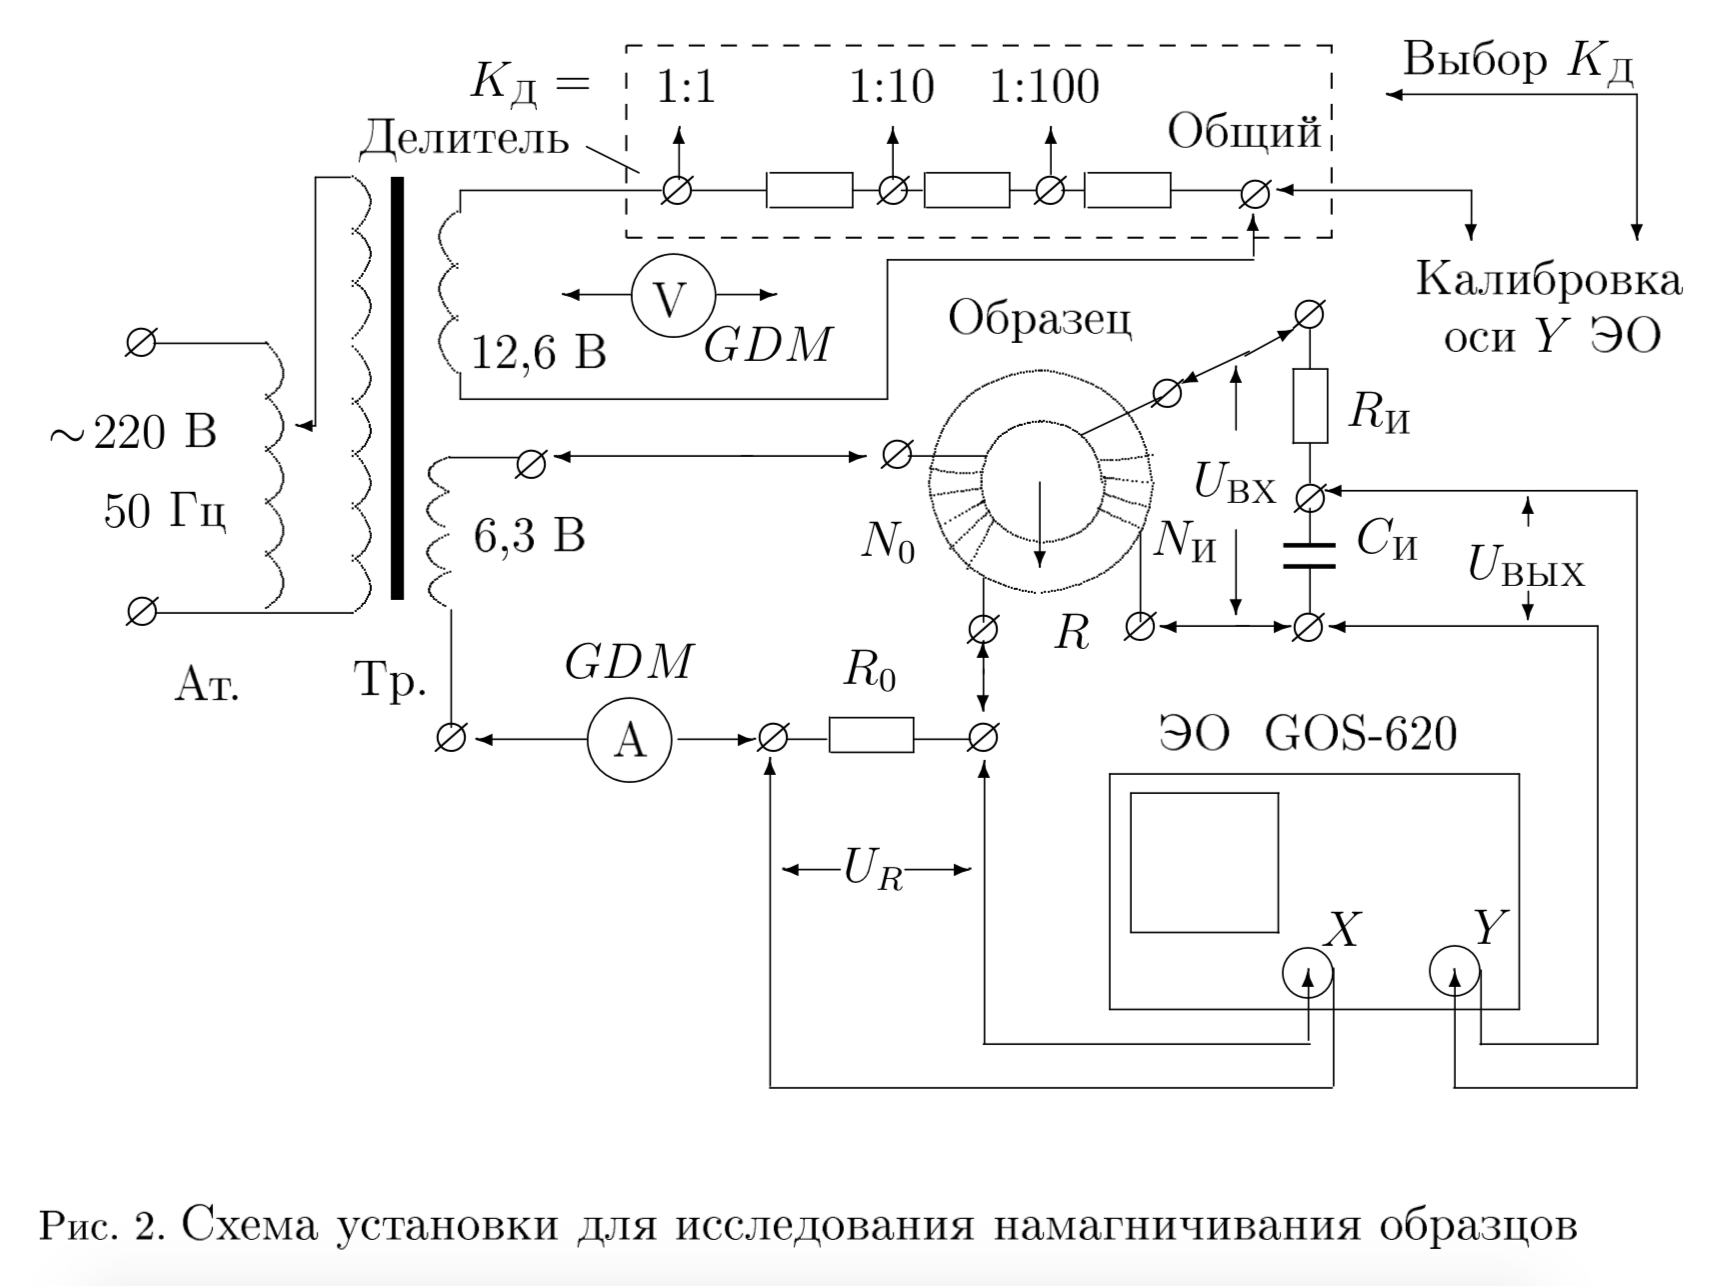

In [36]:
from IPython.core.display import Image, display
display(Image('1.png', width=500, unconfined=True))

In [37]:
## Константы
#0 - пермаллой
#1 - феррит
#2 - кремнистое железо

length = np.array([24,25,10]) #периметр

N_0 = np.array([40, 35, 35]) #число витков

R_0 = 0.3 #Ом
C = 20*1e-6  #мкФ
R = 20000 #Ом

S = np.array([3.8e-4, 3e-4, 1.2e-4]) #сечение

N = np.array([200, 400, 350])

## $U = \frac{2\pi RR_0}{N_0}H$

## $H_x = \frac{K_xN_0}{2\pi RR_0}$

In [38]:
coefs_x = pd.DataFrame(columns=["Kx, V/div", "mx, V/div"])
coefs_x["Kx, V/div"] = [0.05, 0.05, 0.20]
coefs_x["mx, V/div"] = [0.043, 0.043, 0.171]
coefs_x["Hx, A/m"] = round(coefs_x["Kx, V/div"] * (N_0/(length*R_0)), 2)
coefs_x["dHx, A/m"] = round(coefs_x["Hx, A/m"] * (0.025 + 0.003), 2)


coefs_y = pd.DataFrame(columns=["Ky, V/div", "my, V/div"])
coefs_y["Ky, V/div"] = [0.05, 0.02, 0.05]
coefs_y["my, V/div"] = [0.049, 0.019, 0.049]
coefs_y["By, Tl/div"] = round(coefs_y['Ky, V/div'] * R * C / (S * N), 3)

coefs_y["dBy, Tl/div"] = round(coefs_y["By, Tl/div"] * (0.025 + 0.003), 4)

coefs_x

,"Kx, V/div","mx, V/div","Hx, A/m","dHx, A/m"
0,0.05,0.043,27.78,0.78
1,0.05,0.043,23.33,0.65
2,0.20,0.171,233.33,6.53


In [39]:
coefs_y

,"Ky, V/div","my, V/div","By, Tl/div","dBy, Tl/div"
0,0.05,0.049,0.263,0.0074
1,0.02,0.019,0.067,0.0019
2,0.05,0.049,0.476,0.0133


## $U = y \cdot K_y$
## $RC = \frac{U_{вх}}{\Omega U_{вых}}$

## $H = \frac{IN_0}{2\pi R}$
## $B = \frac{R_иС_иU_{вых}}{S N_{и}}$

In [40]:
U_bx = 1 * 3
U_bix = 0.01 * 2.2
Omega = 2 * 3.14 * 50

Tau = U_bx / Omega / U_bix
dTau = Tau * (2 * (coefs_y["dBy, Tl/div"][0] / coefs_y["By, Tl/div"][0])**2)**(1/2)

print ("Время, рассчитанное по формуле: %.2f ± %0.2f s" % (Tau, dTau))


T = R * C

a = 1/(Omega * C)
print (round(a), R)

print("Время, рассчитанное через параметры установки: %.2f s" % (T))


Время, рассчитанное по формуле: 0.43 ± 0.02 s
159 20000
Время, рассчитанное через параметры установки: 0.40 s


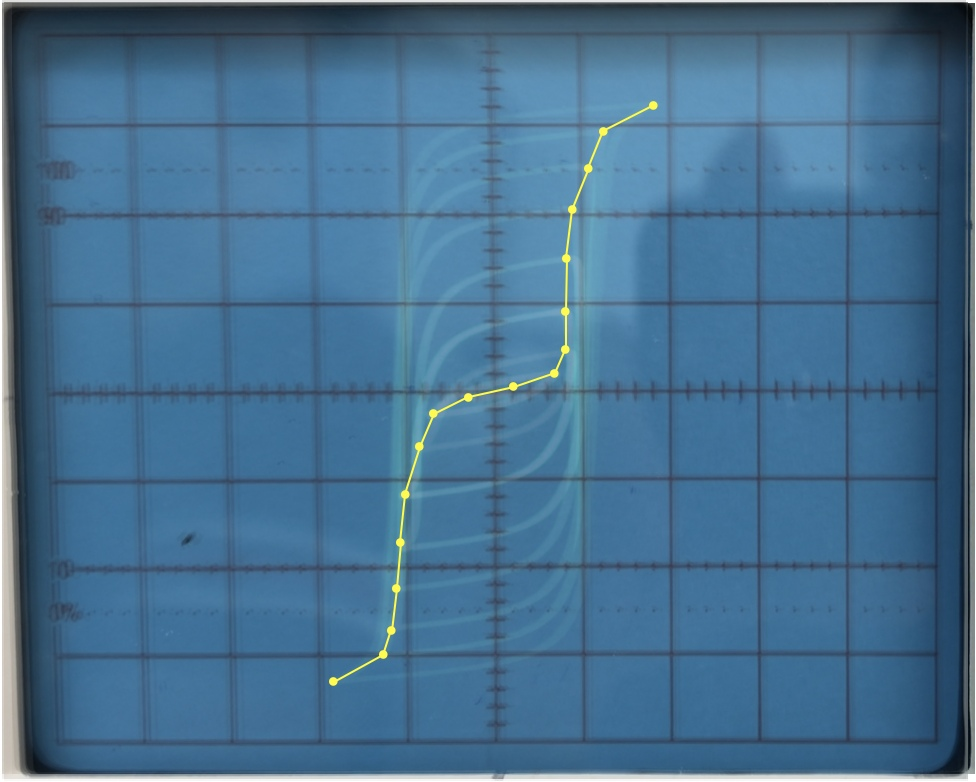

In [41]:
from IPython.core.display import Image, display
display(Image('1_line.jpg', width=500, unconfined=True))

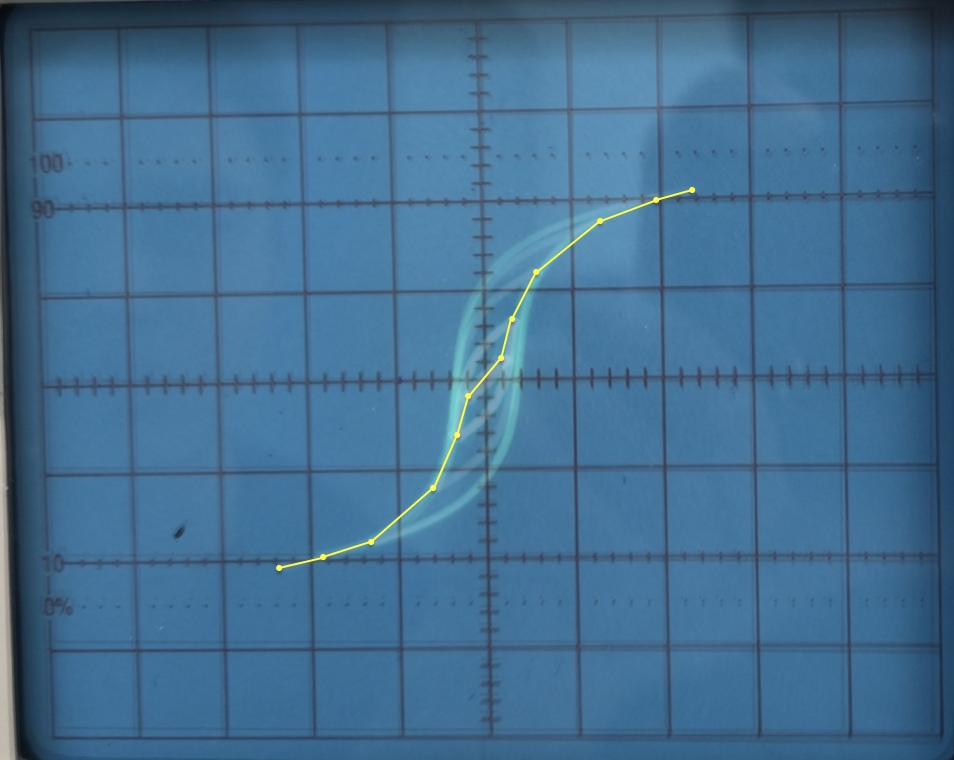

In [42]:
from IPython.core.display import Image, display
display(Image('2_line.jpg', width=500, unconfined=True))

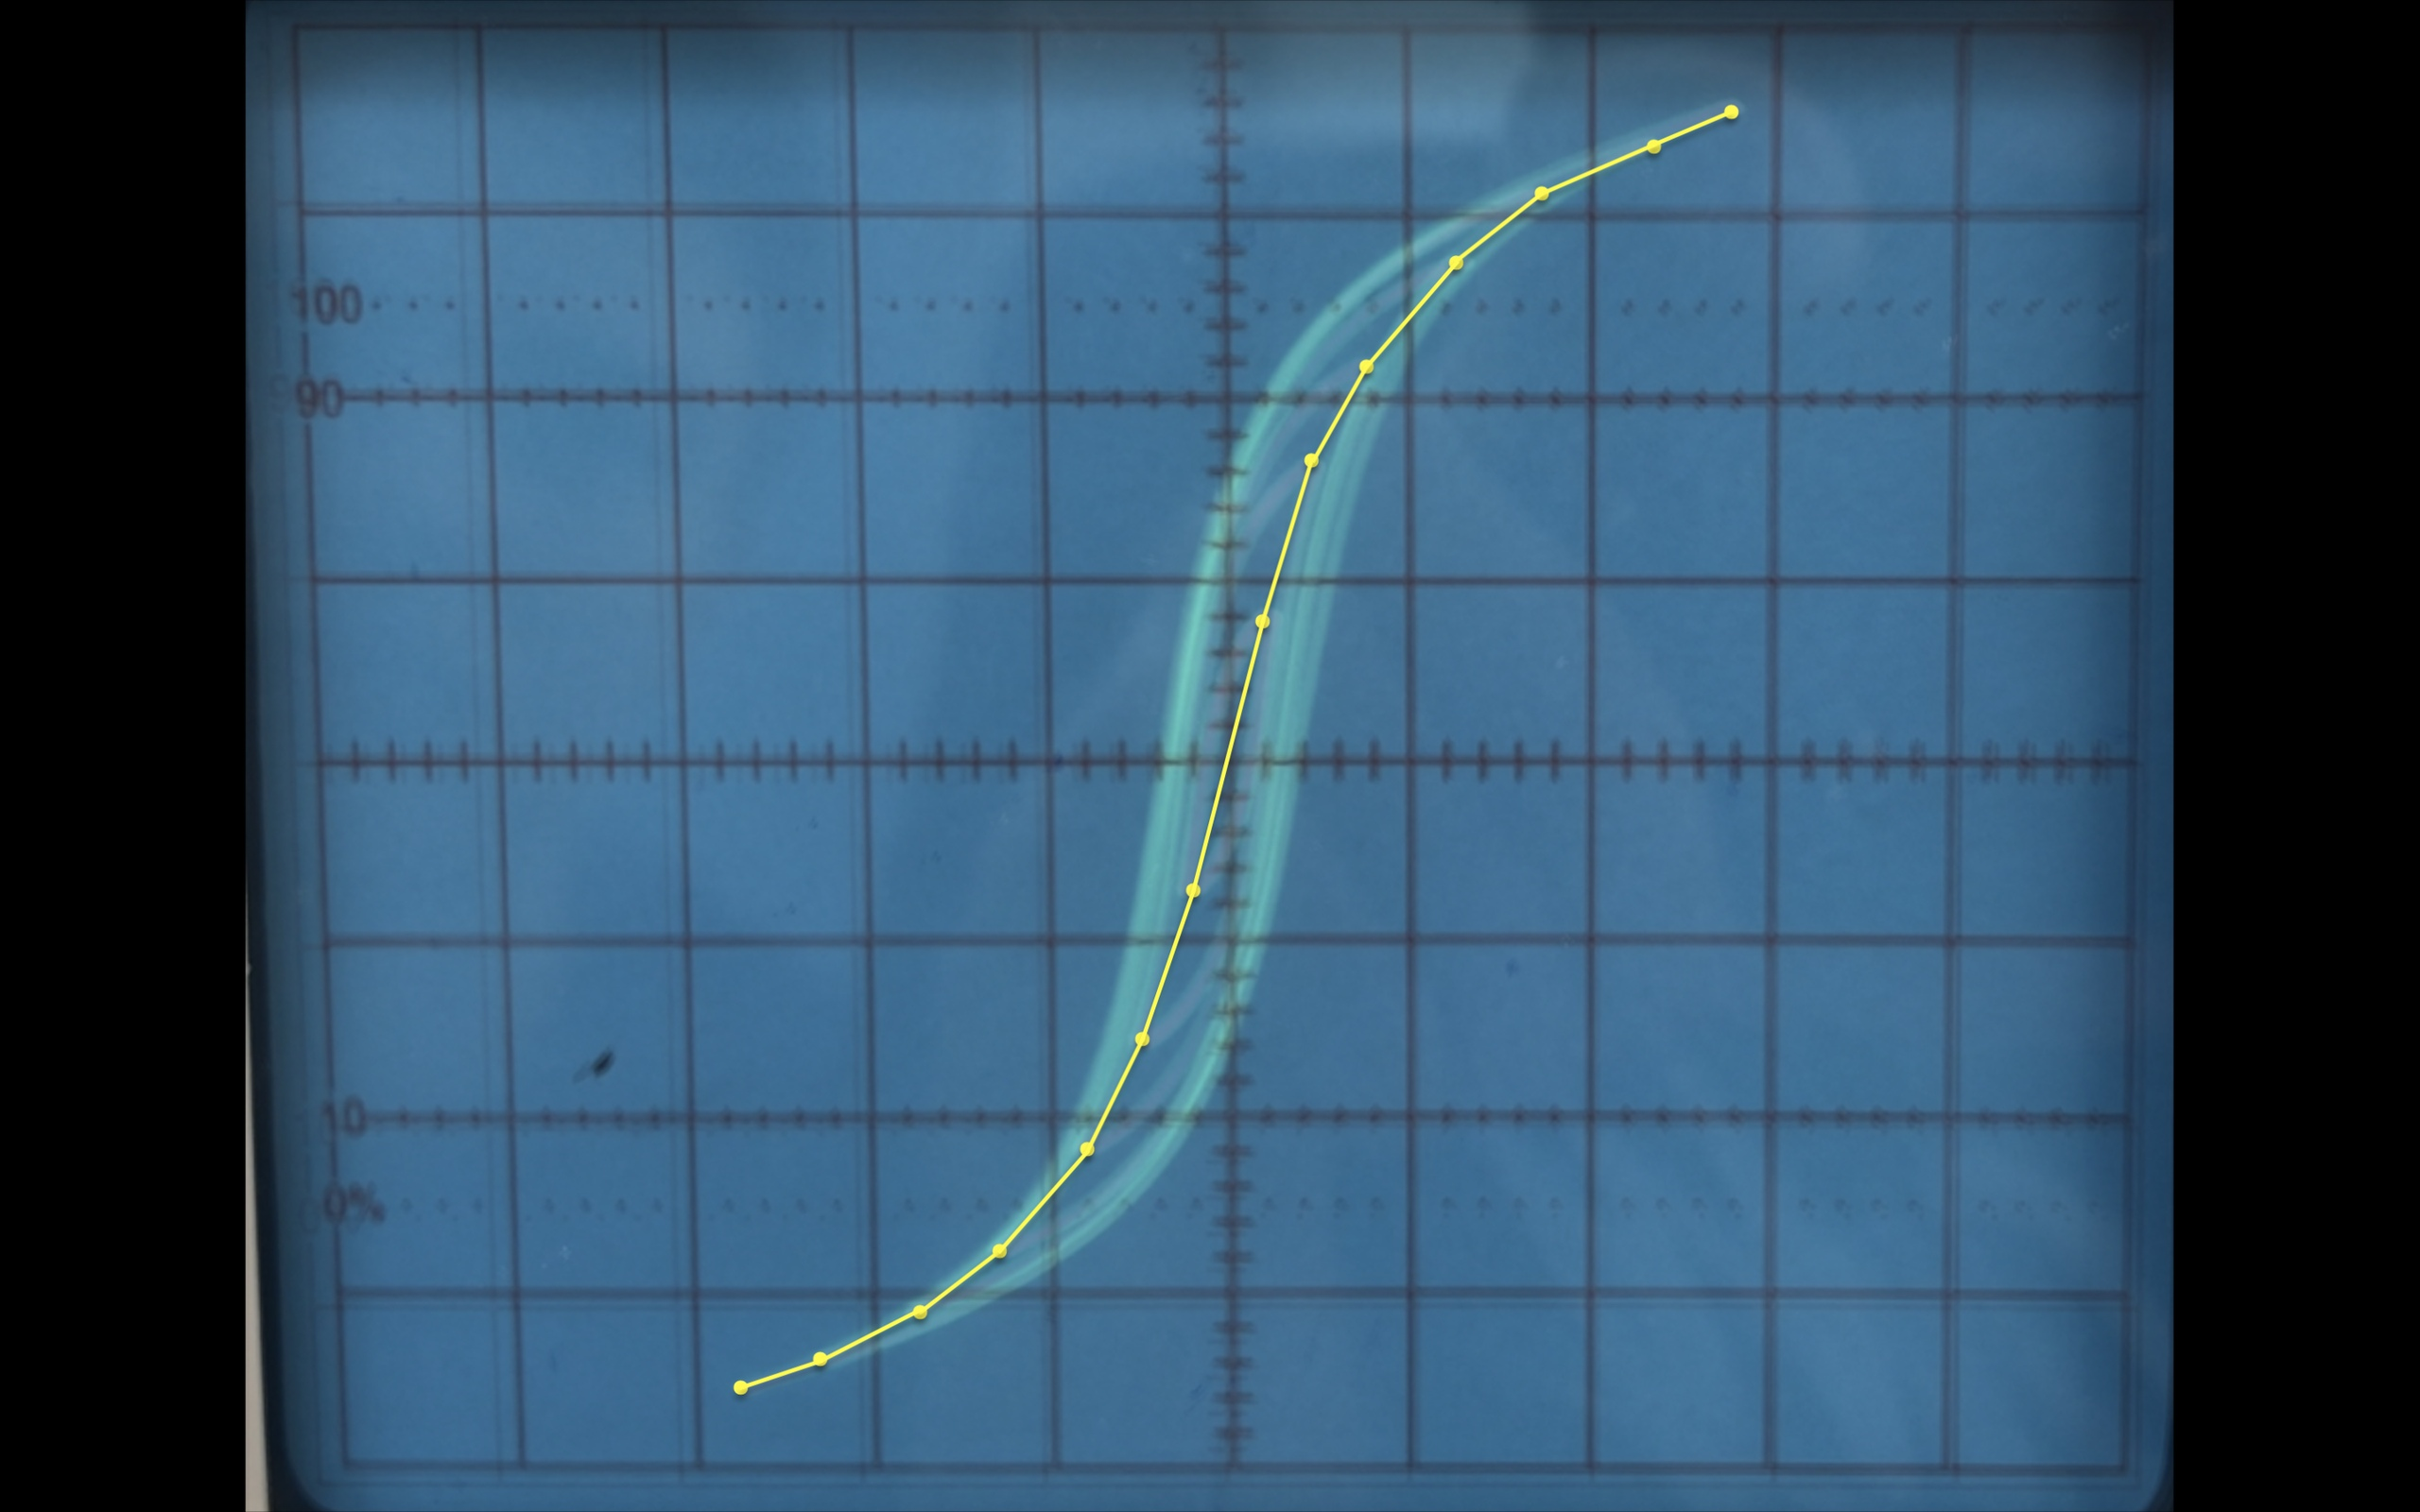

In [43]:
from IPython.core.display import Image, display
display(Image('3_line.jpg', width=500, unconfined=True))

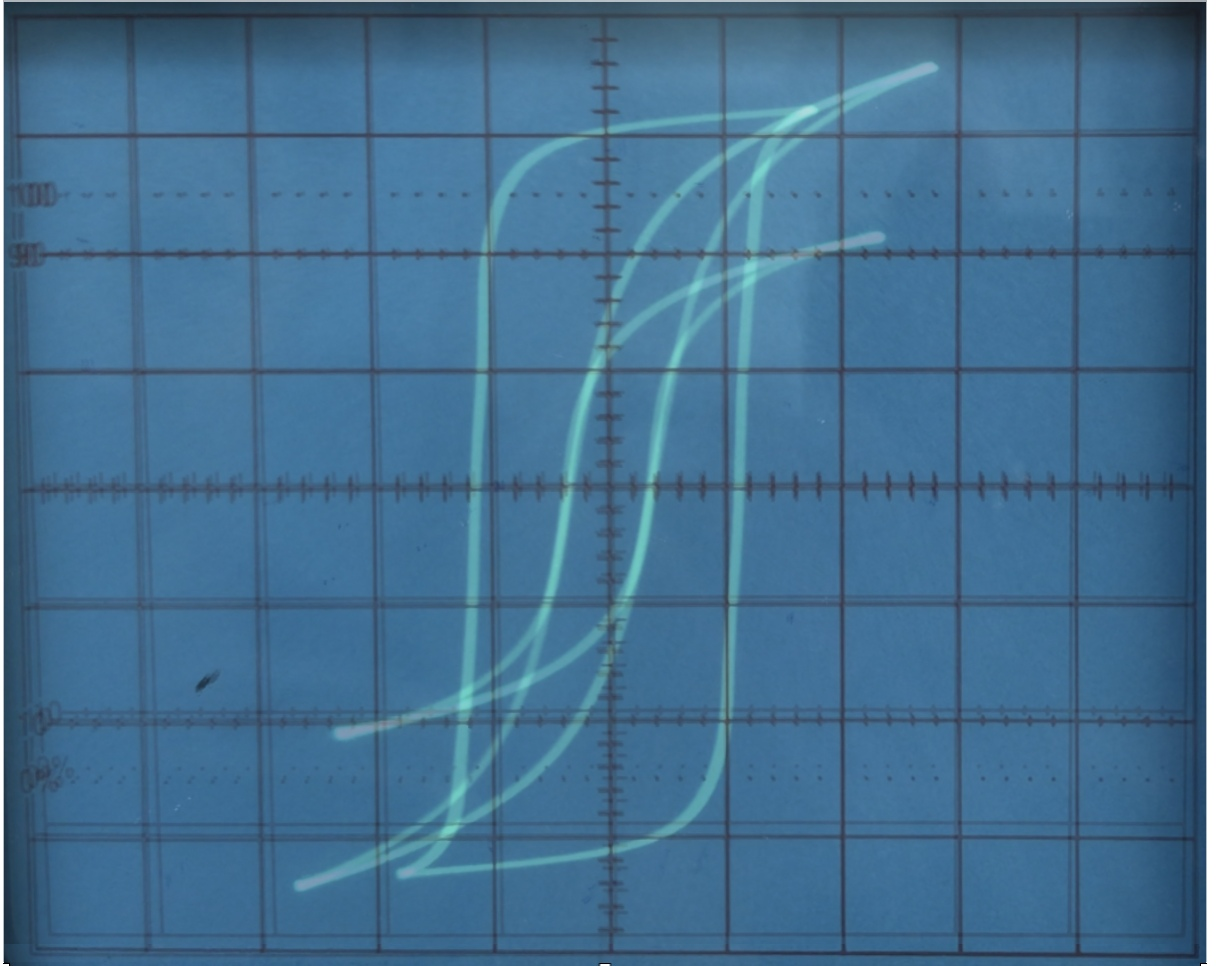

In [44]:
from IPython.core.display import Image, display
display(Image('4.jpg', width=500, unconfined=True))

In [45]:
H_c = np.array([11, 4, 4]) * coefs_x['Hx, A/m']
dH_c = np.array([11, 4, 4]) * coefs_x['Hx, A/m'] * (0.025 + 0.003)
print ("Коэрцитивные силы для трех образцов.")
print ("Пермаллой: : %0.1f ± %.f A/m" % (H_c[0], dH_c[0]))
print ("Феррит: %.1f ± %.f A/m" % (H_c[1], dH_c[1]))
print ("Кремнистое железо: %.1f ± %.f A/m" % (H_c[2], dH_c[2]))

Коэрцитивные силы для трех образцов.
Пермаллой: : 305.6 ± 9 A/m
Феррит: 93.3 ± 3 A/m
Кремнистое железо: 933.3 ± 26 A/m


In [46]:
B_s = np.array([32, 22, 36]) * coefs_y['By, Tl/div']

dB_s = B_s * (0.025 + 0.003)
print ("Индукция насыщения для трех образцов.")
print ("Пермаллой: : %.2f ± %0.3f Tl" % (B_s[0], dB_s[0]))
print ("Феррит: %.2f ± %0.3f Tl" % (B_s[1], dB_s[1]))
print ("Кремнистое железо: %.2f ± %0.3f Tl" % (B_s[2], dB_s[2]))

Индукция насыщения для трех образцов.
Пермаллой: : 8.42 ± 0.236 Tl
Феррит: 1.47 ± 0.041 Tl
Кремнистое железо: 17.14 ± 0.480 Tl


## $\overrightarrow{B} = \mu\mu_0 \overrightarrow{H} \Rightarrow \mu = \frac{1}{\mu_0}\frac{dB}{dH}$
## $\Delta(\mu) = \Delta( \frac{dB}{dH})  = \mu \cdot  \sqrt{(\frac{2 \Delta B}{B})^2 + (\frac{2 \Delta H}{H})^2}$

In [47]:
µ_s = np.array([20, 9, 8]) * coefs_y['By, Tl/div'] / coefs_x['Hx, A/m']/(4 * np.pi * 1e-7)

dµ_s = 1/(4 * np.pi * 1e-7) * np.array([20, 9, 8]) * coefs_y['By, Tl/div'] / coefs_x['Hx, A/m'] * ((2 * coefs_y["dBy, Tl/div"] / coefs_y["By, Tl/div"])**2 + (2* coefs_x["dHx, A/m"]/coefs_x["Hx, A/m"])**2)**(1/2)  
print ("Магнитная проницаемость для трех образцов.")
print ("Пермаллой: : %.2f ± %0.3f H/m" % (µ_s[0], dµ_s[0]))
print ("Феррит: %.2f ± %0.3f H/m" % (µ_s[1], dµ_s[1]))
print ("Кремнистое железо: %.2f ± %0.3f H/m" % (µ_s[2], dµ_s[2]))

Магнитная проницаемость для трех образцов.
Пермаллой: : 150675.85 ± 11978.661 H/m
Феррит: 20568.03 ± 1635.349 H/m
Кремнистое железо: 12987.23 ± 1027.201 H/m


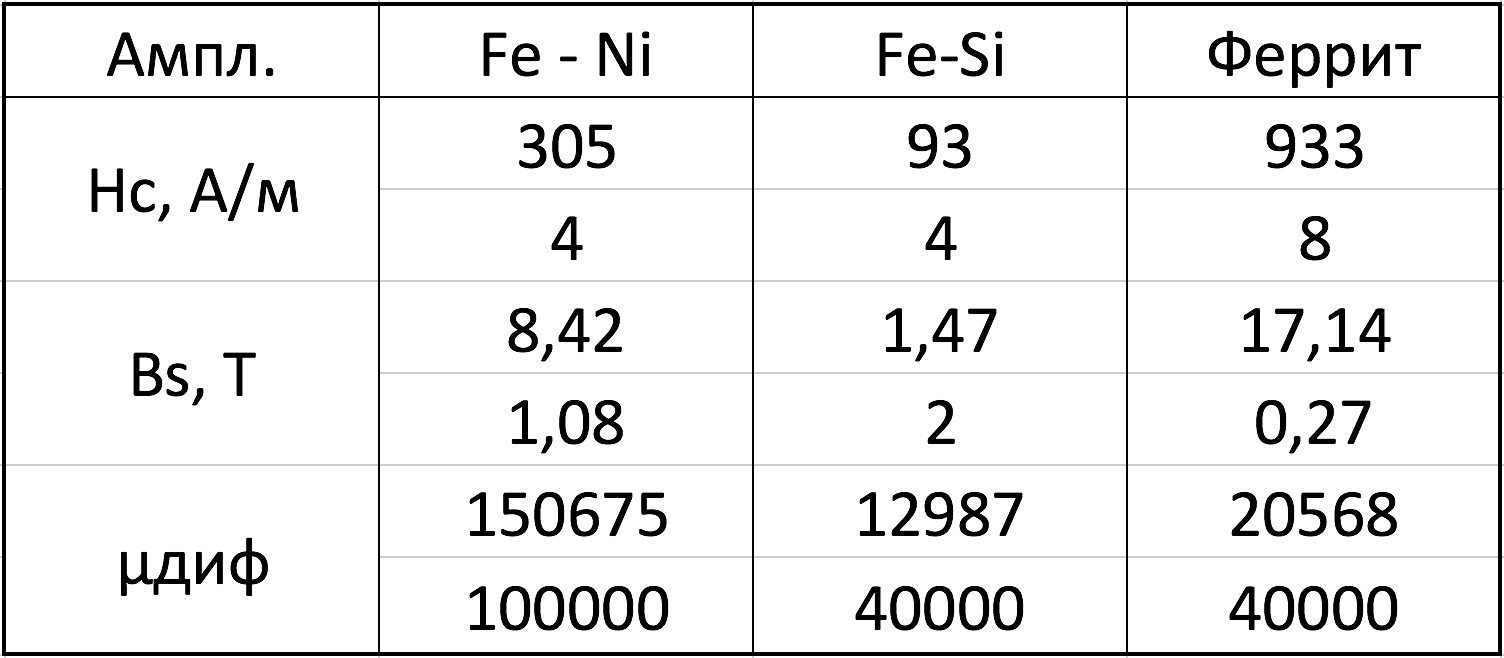

In [48]:
from IPython.core.display import Image, display
display(Image('5.jpg', width=500, unconfined=True))